# GitLab dataset analysis
This notebook aims to analyse the dataset created on GitLab.
The goal is to compare it with the dataset from GitLab.

We will analyse:
1. The size of the dataset: number of bots/humans and the 3 sources.
2. The difference of features between bots and humans in GitLab.
3. The difference of features between GitLab and GitHub (ghmap and rbmap)

In [ ]:
# import numpy as np
# from scipy.stats import mannwhitneyu
#
# # Perform Mann–Whitney U test
# statistic, p_value = mannwhitneyu(ghmap_features['NT'], glmap_features['NT'], alternative='two-sided', method='auto')
#
# print("Mann–Whitney U statistic:", statistic)
# print("p-value:", p_value)
#
# # Interpret result
# alpha = 0.05
# if p_value < alpha:
#     print("Distributions are significantly different (reject H0)")
# else:
#     print("No significant difference between distributions (fail to reject H0)")


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RESOURCE_FOLDER = '../../resources'

## 1. General analysis

This dataset is slightly more imbalanced than the GitHub dataset, with a higher proportion of humans.

Reminder: GitHub had 48.12% of bots and 51.88% of humans.

In [4]:
# Load dataset
glmap_features = pd.read_csv(f"{RESOURCE_FOLDER}/data/gitlab/gitlab_glmap_features.csv")
glmap_features_humans = glmap_features[glmap_features['label'] == 'Human']
glmap_features_bots = glmap_features[glmap_features['label'] == 'Bot']

print(f"Number of contributors = {glmap_features.shape[0]}")
print(f"Number of Human = {glmap_features_humans.shape[0]} ({glmap_features_humans.shape[0] / glmap_features.shape[0] * 100:.2f}%)")
print(f"Number of Bot = {glmap_features_bots.shape[0]} ({glmap_features_bots.shape[0] / glmap_features.shape[0] * 100:.2f}%)")

Number of contributors = 593
Number of Human = 320 (53.96%)
Number of Bot = 273 (46.04%)


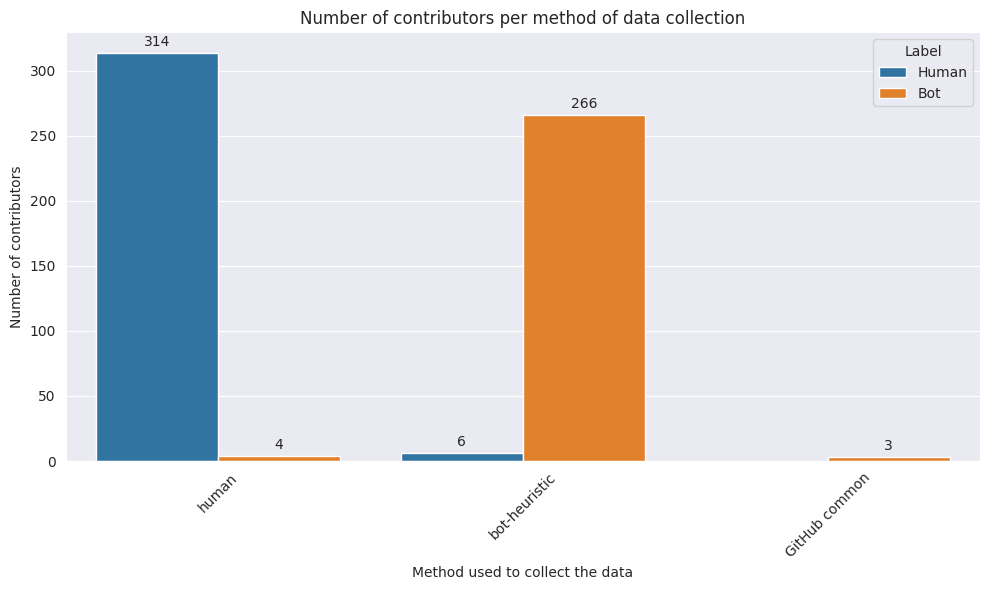

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=glmap_features, x='origin', hue='label', ax=ax)

# Add text labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

ax.set_title('Number of contributors per method of data collection')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.xlabel('Method used to collect the data')
plt.ylabel('Number of contributors')
plt.tight_layout()
plt.show()


## 2. Feature analysis (GitLab only)
In this section, we will compare the features between bots and humans.
The goal is to see if there are significant differences between the two groups.

### 2.1 - Number of activities distribution

The distribution of NA seems to be quite similar between bots and humans.
Both groups have peaks around 250 activities and 30 activities.

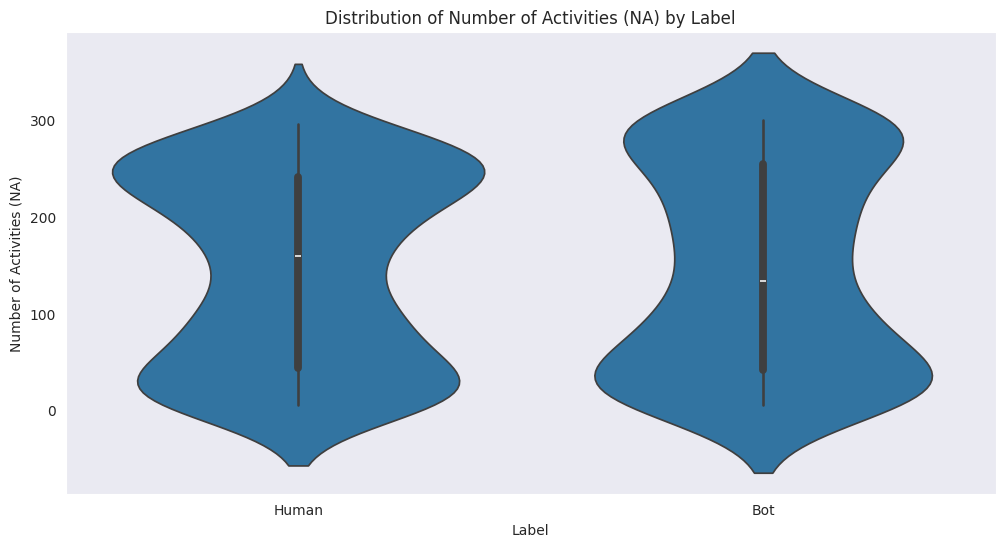

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='NA', data=glmap_features)
plt.title('Distribution of Number of Activities (NA) by Label')
plt.xlabel('Label')
plt.ylabel('Number of Activities (NA)')
plt.grid(axis='y')
plt.show()

### 2.2 - Feature distribution between bots and humans
TODO: Display some interesting features that are different between bots and humans.

TODO: Describe in details the analysis

In [20]:
print(glmap_features.columns)

Index(['contributor', 'label', 'origin', 'NA', 'NT', 'NR', 'NOR', 'ORR',
       'NAR_mean', 'NAR_median', 'NAR_std', 'NAR_gini', 'NAR_IQR', 'NAT_mean',
       'NAT_median', 'NAT_std', 'NAT_gini', 'NAT_IQR', 'NCAR_mean',
       'NCAR_median', 'NCAR_std', 'NCAR_gini', 'NCAR_IQR', 'NTR_mean',
       'NTR_median', 'NTR_std', 'NTR_gini', 'NTR_IQR', 'DCAR_mean',
       'DCAR_median', 'DCAR_std', 'DCAR_gini', 'DCAR_IQR', 'DAAR_mean',
       'DAAR_median', 'DAAR_std', 'DAAR_gini', 'DAAR_IQR', 'DCA_mean',
       'DCA_median', 'DCA_std', 'DCA_gini', 'DCA_IQR', 'DCAT_mean',
       'DCAT_median', 'DCAT_std', 'DCAT_gini', 'DCAT_IQR', 'dataset'],
      dtype='object')


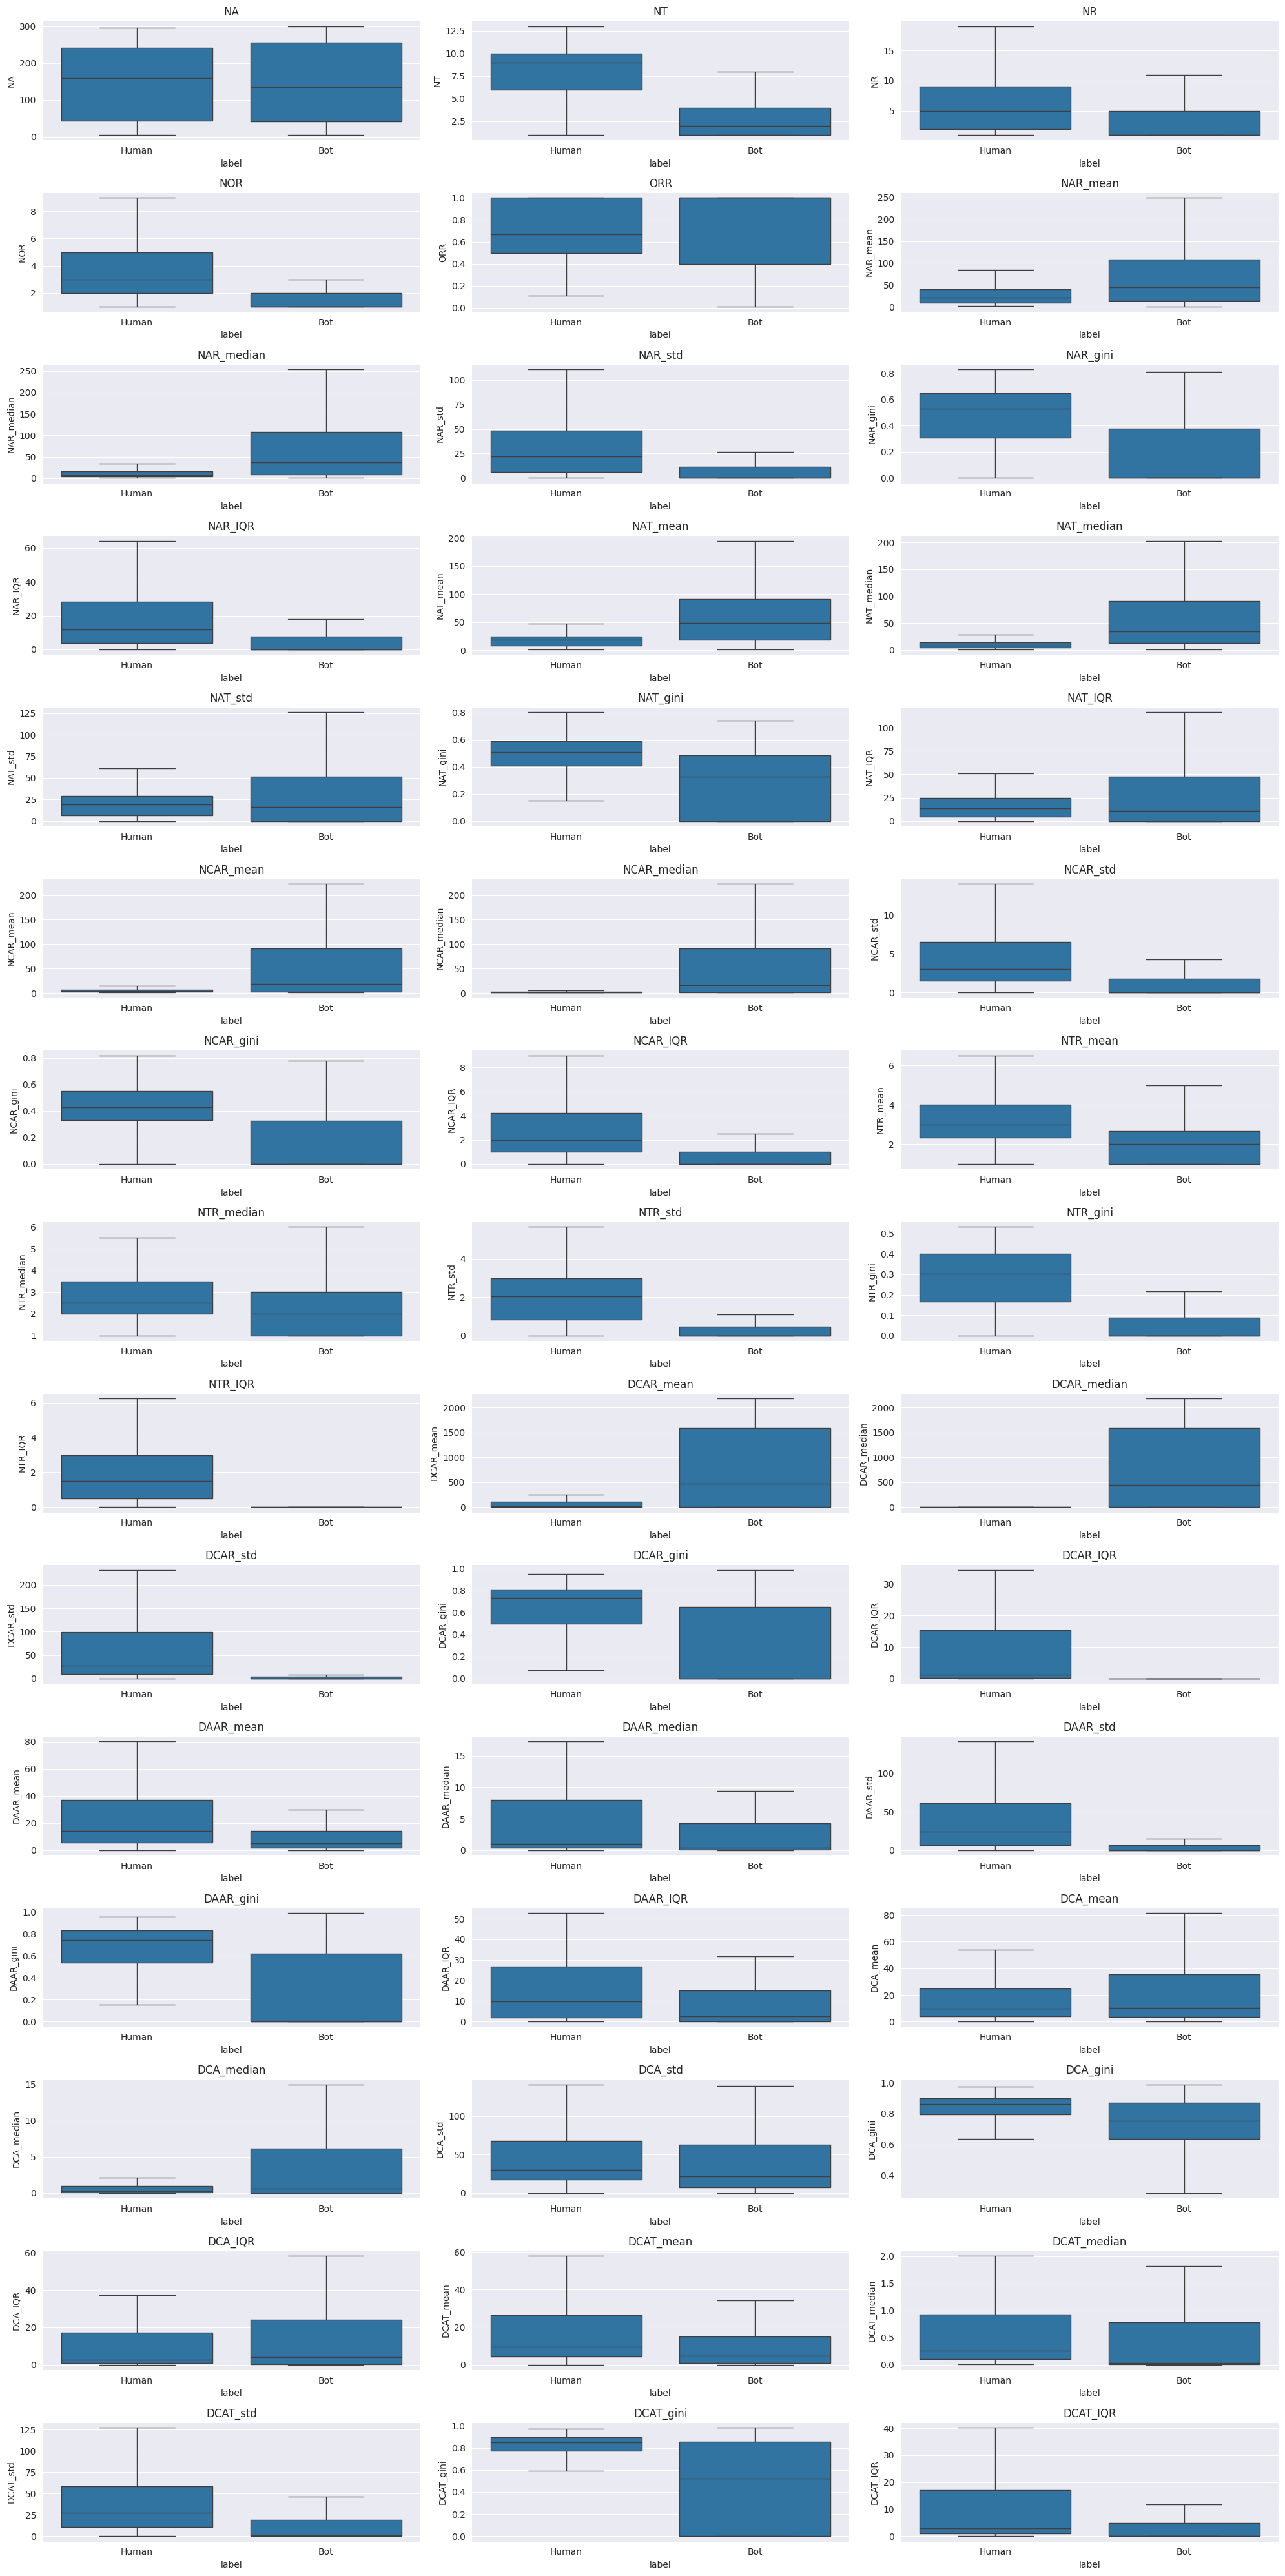

In [23]:
fig, axes = plt.subplots(15, 3, figsize=(20, 40))
for i, col in enumerate(glmap_features.columns[3:-1]):
    sns.boxplot(x='label', y=col, data=glmap_features, ax=axes[i//3, i%3], showfliers=False)
    axes[i//3, i%3].set_title(col)
plt.tight_layout()
plt.show()

## 3. Feature comparison between GitLab and GitHub
In this section, we will compare the features between GitLab and GitHub (ghmap).

The goal is to see if there are significant differences between the two datasets.

In [27]:
rbmap_features = pd.read_csv(f"{RESOURCE_FOLDER}/data/github/new-rbmap_features.csv")
ghmap_features = pd.read_csv(f"{RESOURCE_FOLDER}/data/github/new-ghmap_features.csv")
print(f"Number of contributors in GitHub = {ghmap_features.shape[0]}")
print(f"Number of humans in GitHub = {ghmap_features[ghmap_features['label'] == 'Human'].shape[0]}")
print(f"Number of bots in GitHub = {ghmap_features[ghmap_features['label'] == 'Bot'].shape[0]}")

rbmap_features['dataset'] = 'rbmap'
ghmap_features['dataset'] = 'ghmap'
glmap_features['dataset'] = 'glmap'

Number of contributors in GitHub = 1872
Number of humans in GitHub = 955
Number of bots in GitHub = 917


### 3.1 - Overall comparison
In this case, we will compare the differences overall between the three datasets. (We won't split by label)


#### 3.1.1 - Number of activities distribution

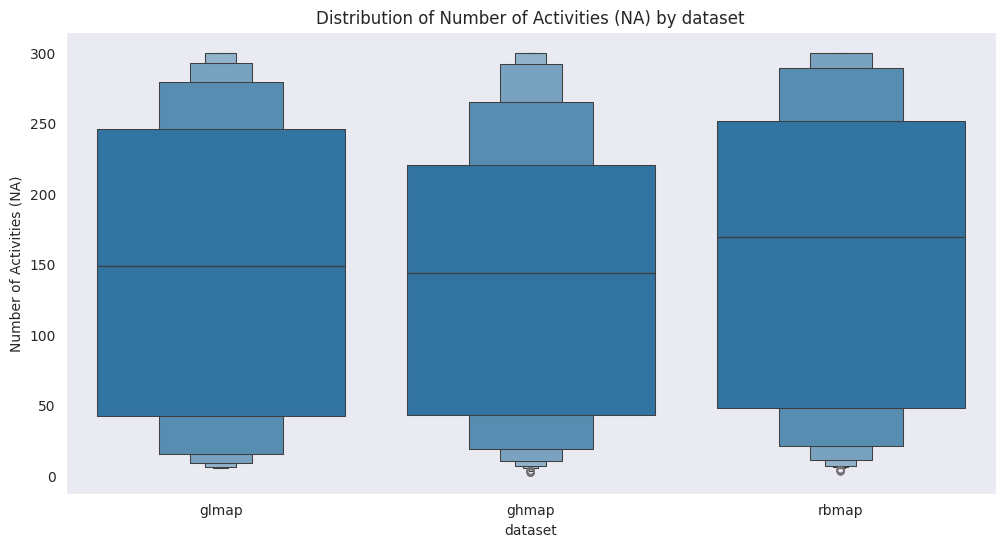

In [46]:
# human-glmap & human-ghmap | bot-glmap & bot-ghmap
plt.figure(figsize=(12, 6))
sns.boxenplot(x='dataset', y='NA', data=pd.concat([glmap_features, ghmap_features, rbmap_features]))
plt.title('Distribution of Number of Activities (NA) by dataset')
plt.xlabel('dataset')
plt.ylabel('Number of Activities (NA)')
plt.grid(axis='y')
plt.show()

#### 3.1.2 - Feature distribution between datasets

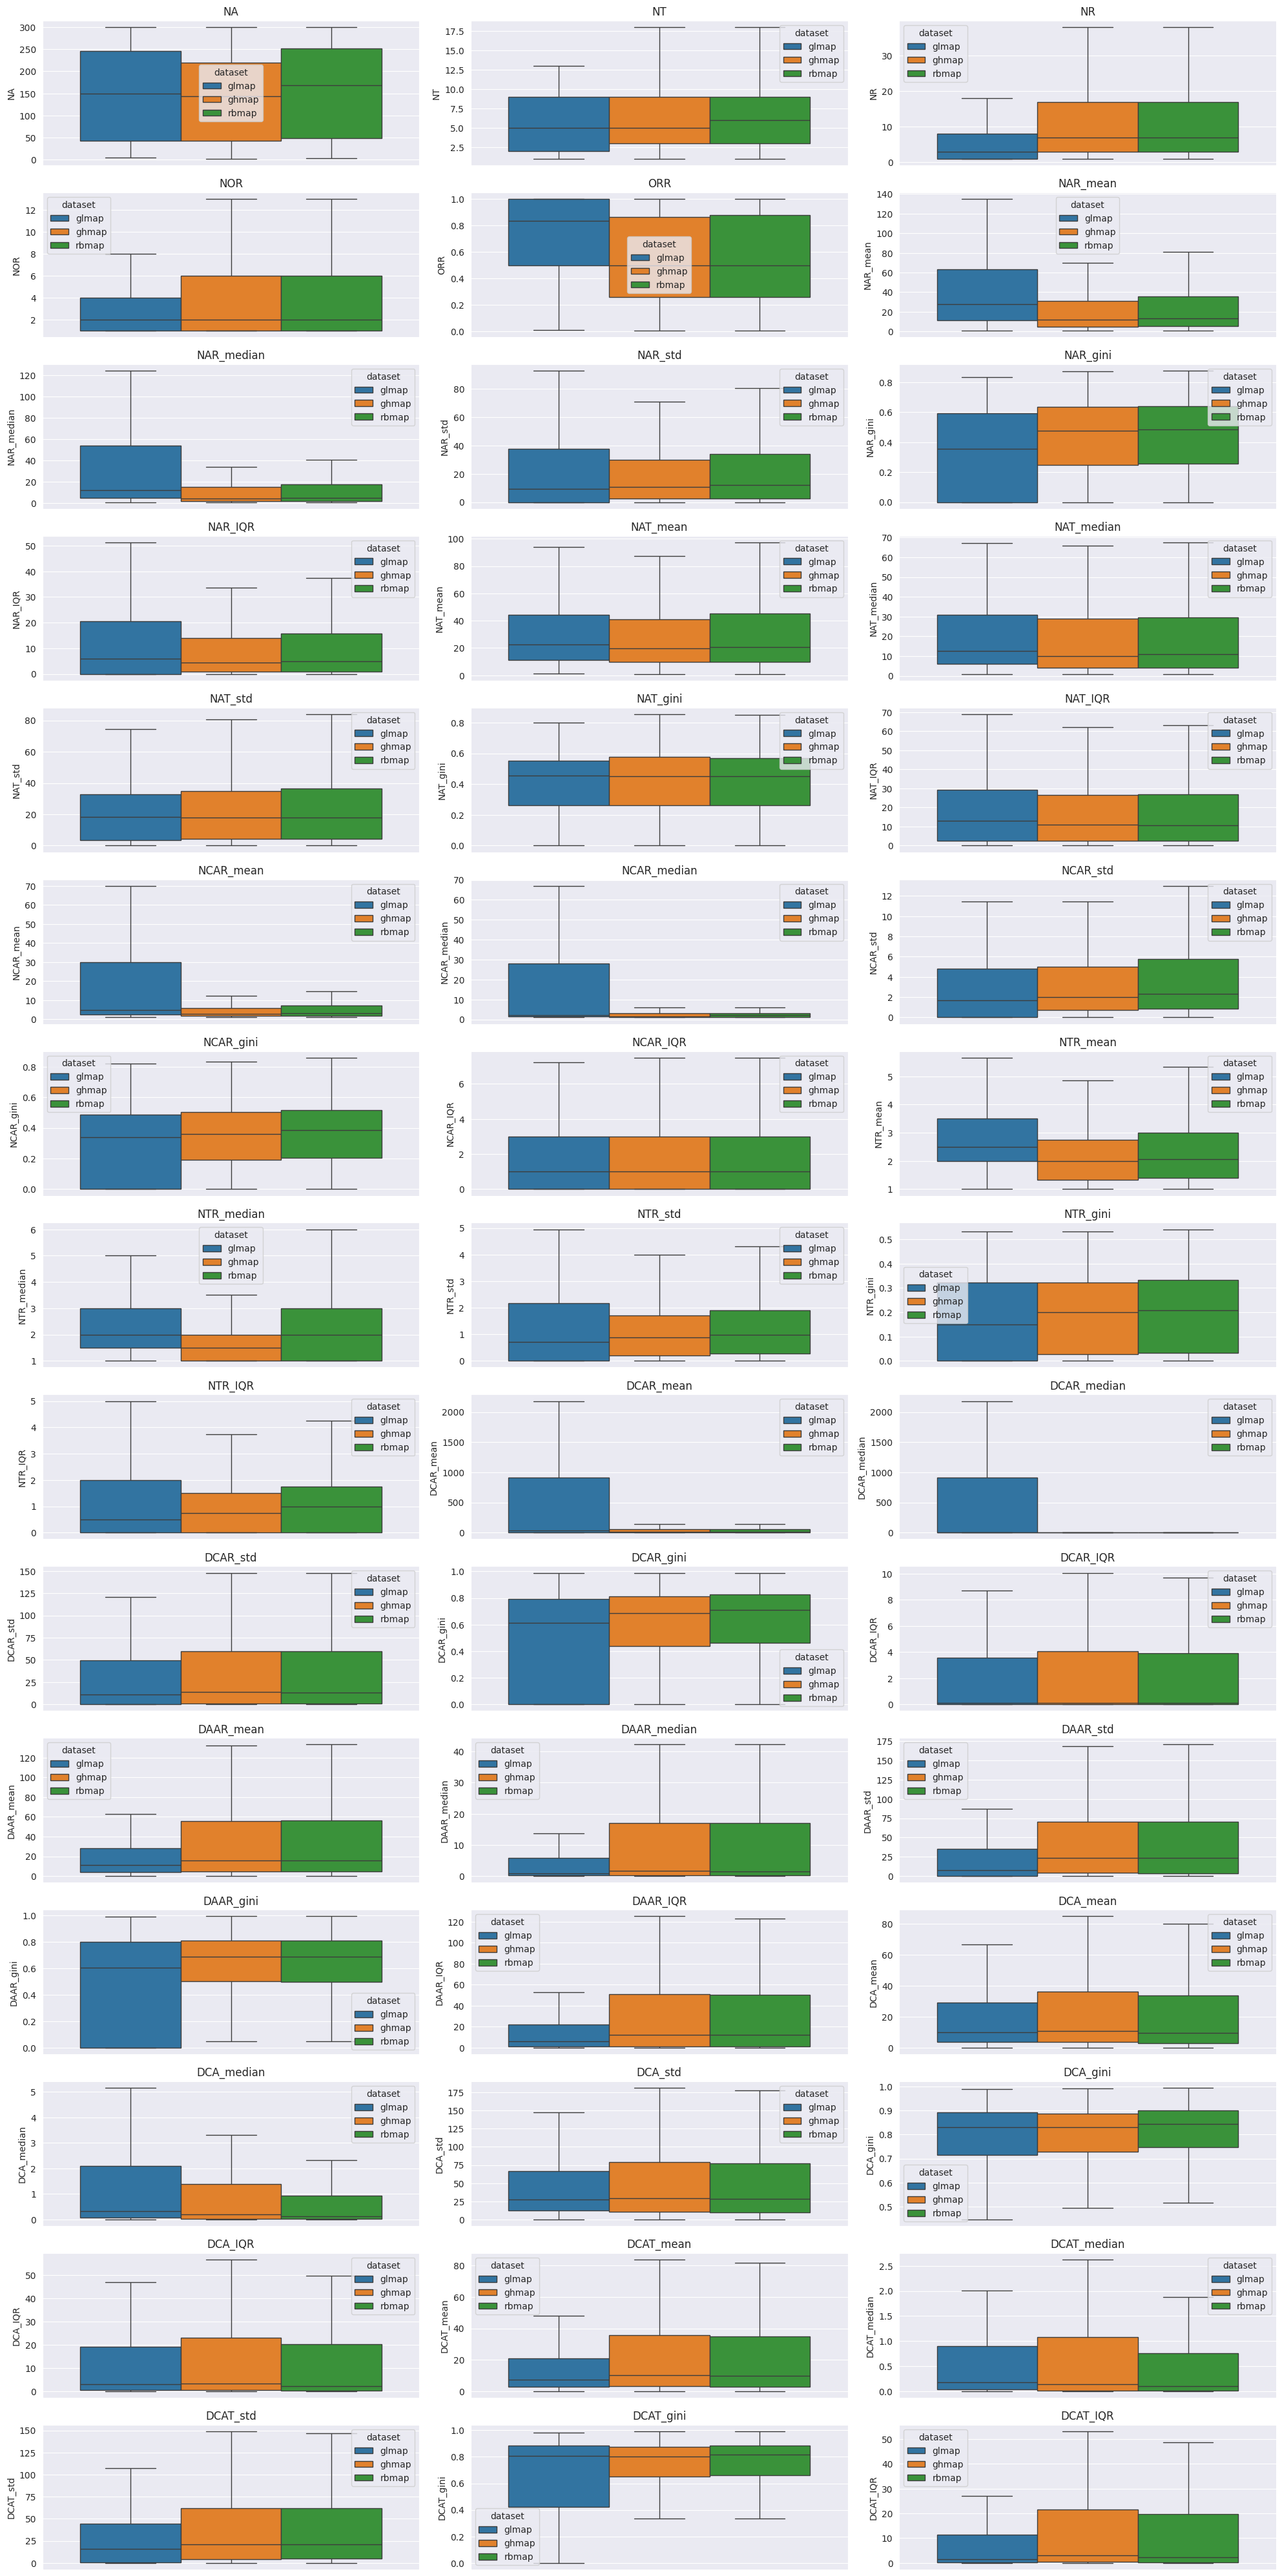

In [47]:
fig, axes = plt.subplots(15, 3, figsize=(20, 40))
for i, col in enumerate(glmap_features.columns[3:-1]):
    sns.boxplot(y=col, hue='dataset', data=pd.concat([glmap_features, ghmap_features, rbmap_features], ignore_index=True), ax=axes[i//3, i%3], showfliers=False)
    axes[i//3, i%3].set_title(col)
plt.tight_layout()
plt.show()

### 3.2 - Comparison by label

#### 3.2.1 - Number of activities distribution

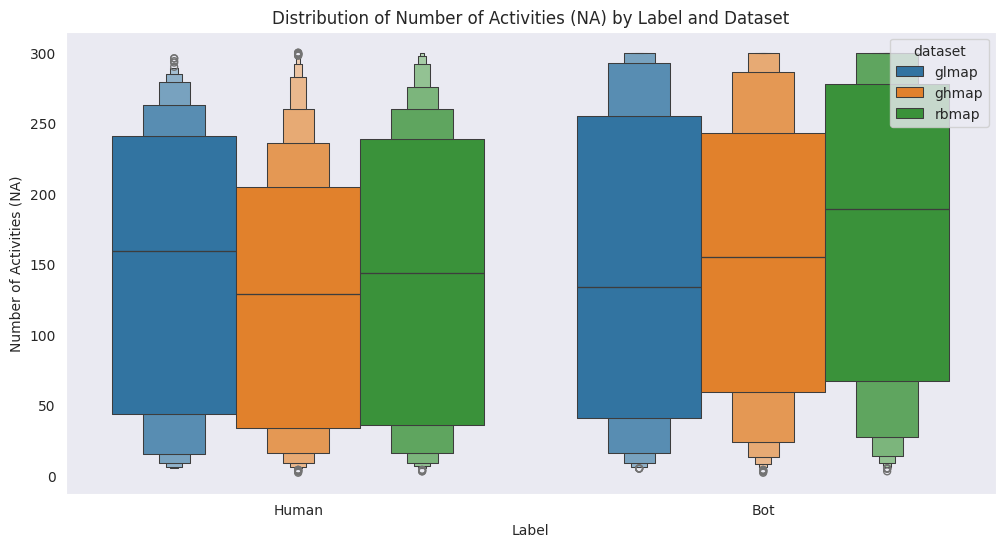

In [42]:
# human-glmap & human-ghmap | bot-glmap & bot-ghmap
plt.figure(figsize=(12, 6))
sns.boxenplot(x='label', y='NA', hue='dataset', data=pd.concat([glmap_features, ghmap_features, rbmap_features]))
plt.title('Distribution of Number of Activities (NA) by Label and Dataset')
plt.xlabel('Label')
plt.ylabel('Number of Activities (NA)')
plt.grid(axis='y')
plt.show()

#### 3.2.2 - Feature distribution between bots and humans

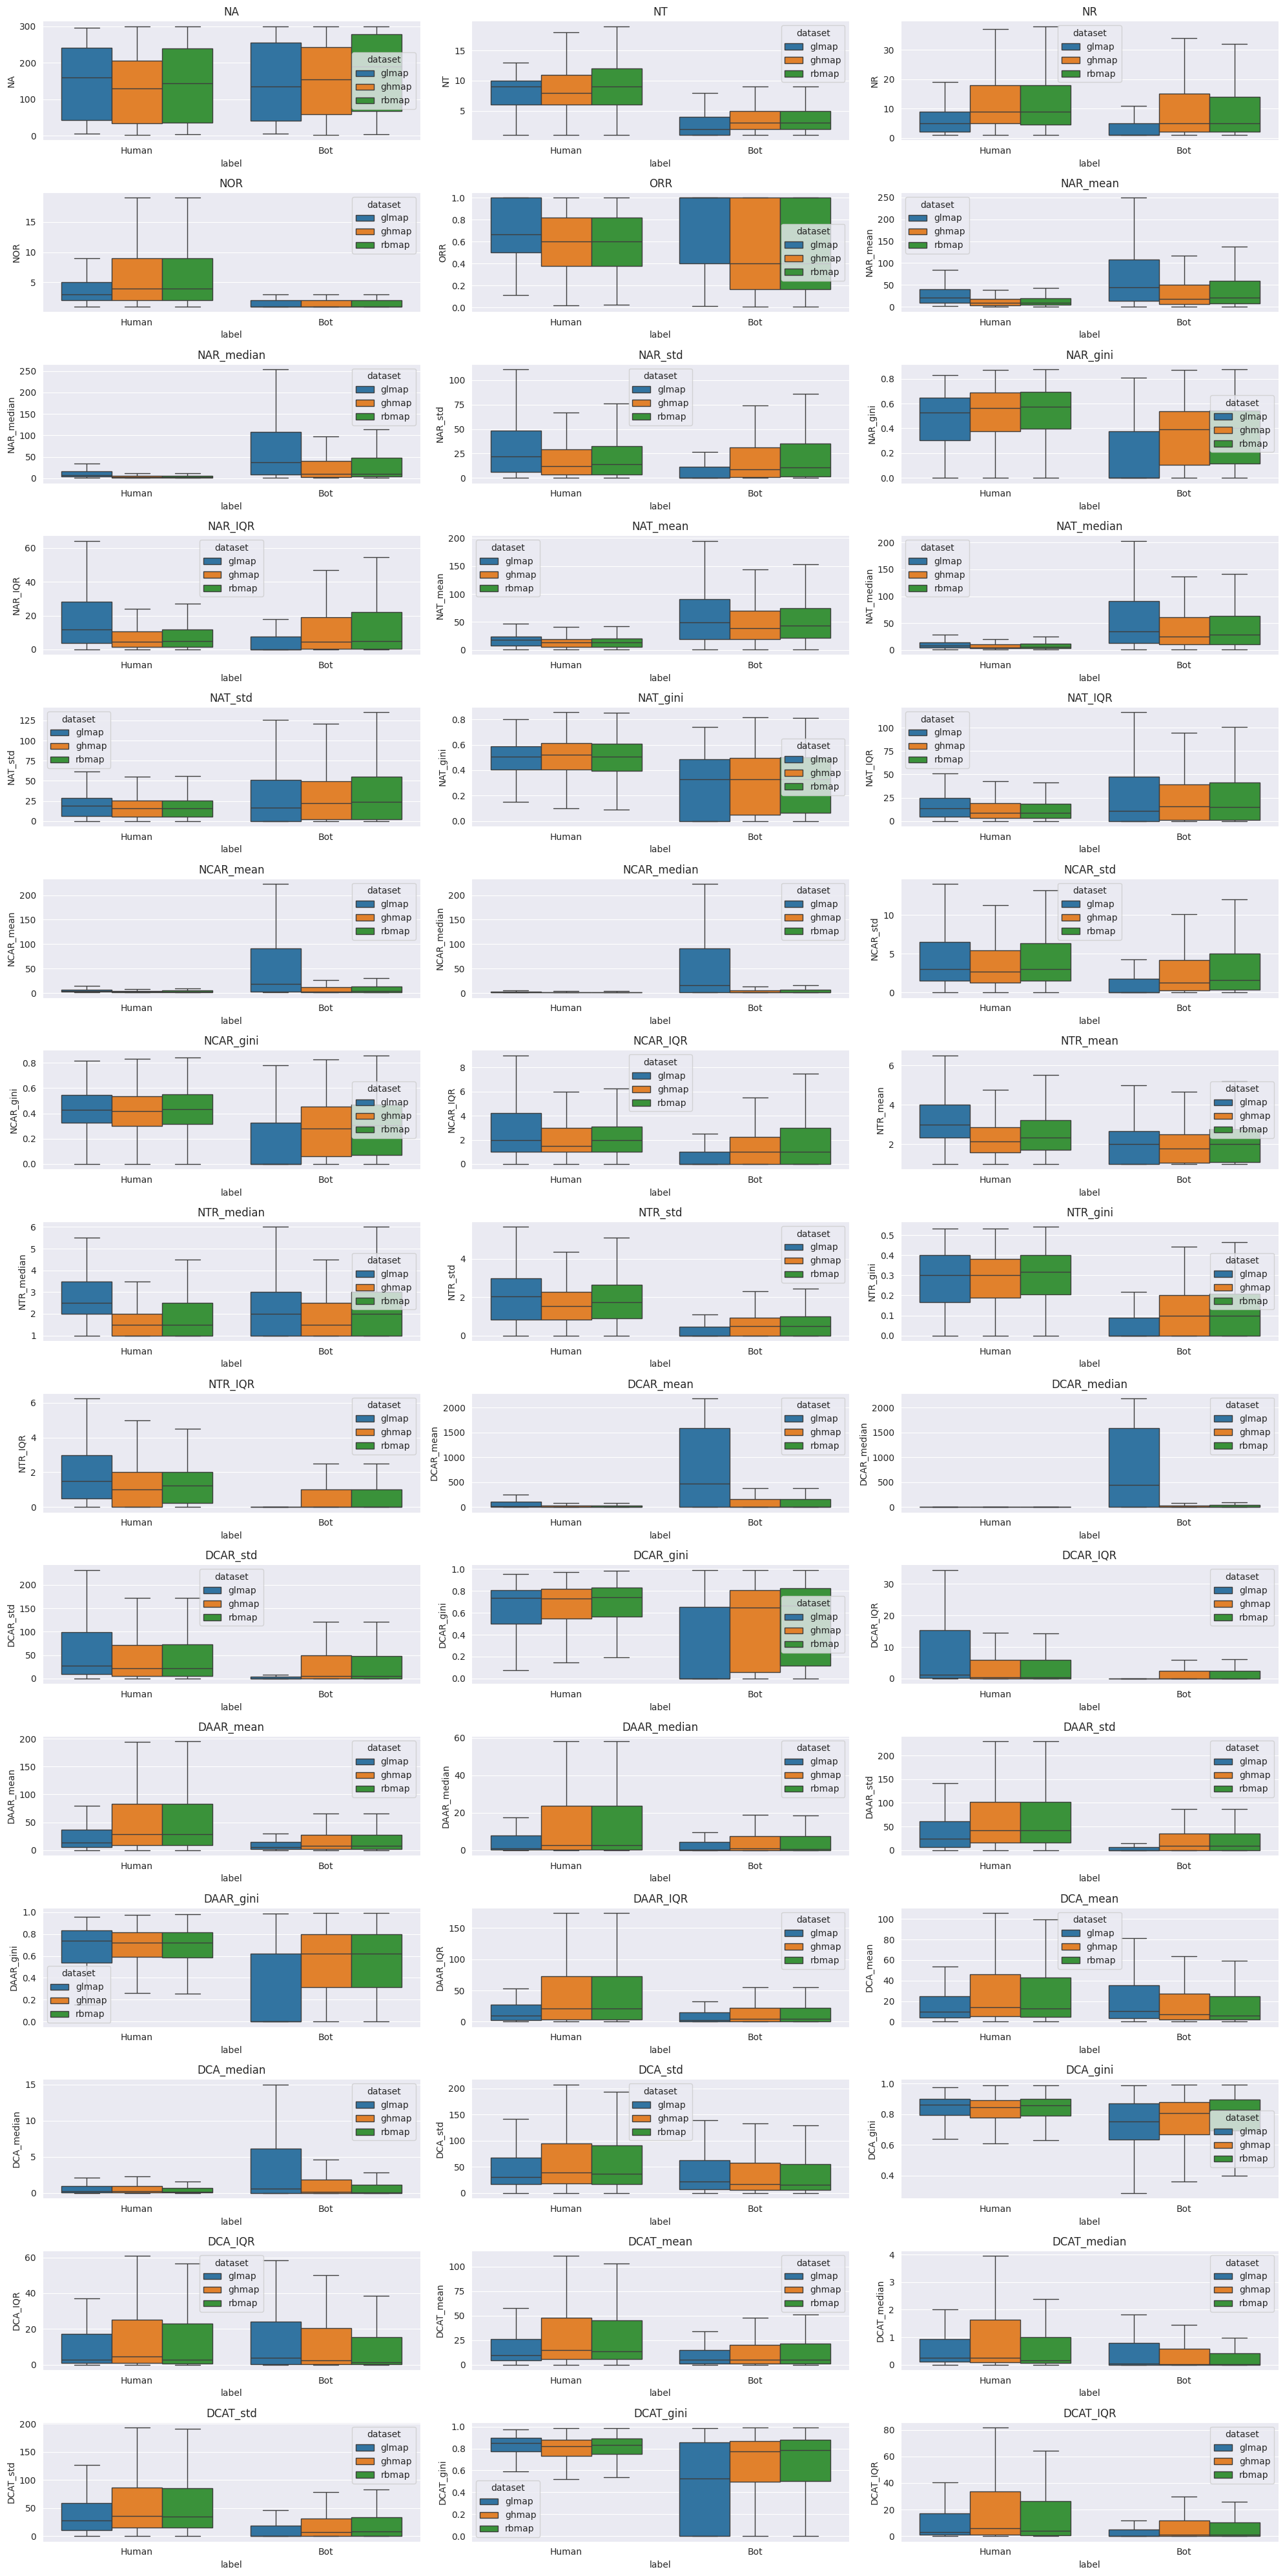

In [39]:
fig, axes = plt.subplots(15, 3, figsize=(20, 40))
for i, col in enumerate(glmap_features.columns[3:-1]):
    sns.boxplot(x='label', y=col, hue='dataset', data=pd.concat([glmap_features, ghmap_features, rbmap_features], ignore_index=True), ax=axes[i//3, i%3], showfliers=False)
    axes[i//3, i%3].set_title(col)
plt.tight_layout()
plt.show()